In [5]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 5.3 MB/s 


In [3]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [6]:
import pandas_profiling
import nltk
import numpy as np
import pandas as pd
import re 
import matplotlib.pyplot as plt 
import seaborn as sns
from nltk.corpus import stopwords
stop = stopwords.words('english')
import warnings
warnings.filterwarnings("ignore")
import unidecode
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import matplotlib.animation as animation 
import operator
import plotly.express as px
from collections import Counter
%matplotlib inline

In [7]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# from keras.models import Sequential
# from keras.layers import Conv1D, Embedding, Dense, MaxPool1D, LSTM, Dropout
# from keras_preprocessing.text import Tokenizer
# from keras_preprocessing.sequence import pad_sequences
from wordcloud import WordCloud

In [8]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC

In [9]:
df = pd.read_csv('FakeNewsDataset.csv')
df # 1 = Fake; 0 = Real

,text,label
0,,1
1,Immediately following President Trump s inaugu...,1
2,The Senate Republicans unveiled their disastro...,1
3,PARIS — A French farmer who smuggled Africa...,0
4,We ve made it very easy for you to pick up the...,1
...,...,...
70893,United States Marine Field McConnell Plum Cit...,0
70894,"Dienstag, 1. November 2016 Überall grässliche ...",1
70895,Shawn Helton 21st Century WireThe 2016 Democra...,1
70896,How many Hillary supporters does it take to fi...,1


In [10]:
print('length of real news',len(df[df['label']==0]))
print('length of fake news',len(df[df['label']==1]))

length of real news 34143
length of fake news 36755


# Cleaning of the Dataset

In [11]:
df.drop_duplicates(inplace = True)
df['text'] = df['text'].fillna("")

#remove numbers
df['clean_text'] = df['text'].apply(lambda x : " ".join([text for text in x.split() if not text == '\d*']))

#code to remove @ mentions
df['clean_text'] = df['clean_text'].apply(lambda x : " ".join([text for text in x.split() if not text.startswith('@')]))

#removing all the greek characters using unidecode library
df['clean_text'] = df['clean_text'].apply(lambda x : ' '.join([unidecode.unidecode(word) for word in x.split()]))

# removing zero and more white spaces
df['clean_text'] = df['clean_text'].str.replace(r'\s*@\w+', '', regex=True)
df['clean_text'] = df['clean_text'].str.replace(r'\s*\B@\w+', '', regex=True)
df['clean_text'] = df['clean_text'].str.replace(r'\s*@\S+', '', regex=True)
df['clean_text'] = df['clean_text'].str.replace(r'\s*@\S+\b', '', regex=True)

#to lower the texts
df['clean_text'] = df['clean_text'].apply(lambda x : x.lower())

#removing hashtags and mention
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub("@[A-Za-z0-9_]+","", x))
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub("#[A-Za-z0-9_]+","", x))

# to avoid removing contractions in english
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub("'", "", x))

#removing links
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'http\S+', '', x))
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r"www.\S+", "", x))

#removing punctuation
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub('[()!?]', ' ', x))
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub('\[.*?\]',' ', x))

#filtering non - alphanumeric characters
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub("[^a-z0-9]"," ", x))

df

,text,label,clean_text
0,,1,
1,Immediately following President Trump s inaugu...,1,immediately following president trump s inaugu...
2,The Senate Republicans unveiled their disastro...,1,the senate republicans unveiled their disastro...
3,PARIS — A French farmer who smuggled Africa...,0,paris a french farmer who smuggled african ...
4,We ve made it very easy for you to pick up the...,1,we ve made it very easy for you to pick up the...
...,...,...,...
70891,During a recent appearance on Good Morning Bri...,1,during a recent appearance on good morning bri...
70892,WASHINGTON (Reuters) - Vice President-elect Mi...,0,washington reuters vice president elect mi...
70893,United States Marine Field McConnell Plum Cit...,0,united states marine field mcconnell plum city...
70894,"Dienstag, 1. November 2016 Überall grässliche ...",1,dienstag 1 november 2016 uberall grassliche ...


In [12]:
#tokenization
df['text_tokenized'] = df['clean_text'].apply(lambda x: re.split('\W+', x))

#removing stopwords
df['text_nonstop'] = df['text_tokenized'].apply(lambda x: [word for word in x if word not in stop])

#lemmatization
wn = WordNetLemmatizer()
df['text_lemmatized'] = df['text_nonstop'].apply(lambda x: [wn.lemmatize(word) for word in x])

#final text
df['final_text'] = df['text_lemmatized'].apply(lambda x: ' '.join(word for word in x))

df

,text,label,clean_text,text_tokenized,text_nonstop,text_lemmatized,final_text
0,,1,,[],[],[],
1,Immediately following President Trump s inaugu...,1,immediately following president trump s inaugu...,"[immediately, following, president, trump, s, ...","[immediately, following, president, trump, ina...","[immediately, following, president, trump, ina...",immediately following president trump inaugura...
2,The Senate Republicans unveiled their disastro...,1,the senate republicans unveiled their disastro...,"[the, senate, republicans, unveiled, their, di...","[senate, republicans, unveiled, disastrous, he...","[senate, republican, unveiled, disastrous, hea...",senate republican unveiled disastrous health c...
3,PARIS — A French farmer who smuggled Africa...,0,paris a french farmer who smuggled african ...,"[paris, a, french, farmer, who, smuggled, afri...","[paris, french, farmer, smuggled, african, mig...","[paris, french, farmer, smuggled, african, mig...",paris french farmer smuggled african migrant s...
4,We ve made it very easy for you to pick up the...,1,we ve made it very easy for you to pick up the...,"[we, ve, made, it, very, easy, for, you, to, p...","[made, easy, pick, phone, go, facebook, pages,...","[made, easy, pick, phone, go, facebook, page, ...",made easy pick phone go facebook page let sena...
...,...,...,...,...,...,...,...
70891,During a recent appearance on Good Morning Bri...,1,during a recent appearance on good morning bri...,"[during, a, recent, appearance, on, good, morn...","[recent, appearance, good, morning, britain, d...","[recent, appearance, good, morning, britain, d...",recent appearance good morning britain donald ...
70892,WASHINGTON (Reuters) - Vice President-elect Mi...,0,washington reuters vice president elect mi...,"[washington, reuters, vice, president, elect, ...","[washington, reuters, vice, president, elect, ...","[washington, reuters, vice, president, elect, ...",washington reuters vice president elect mike p...
70893,United States Marine Field McConnell Plum Cit...,0,united states marine field mcconnell plum city...,"[united, states, marine, field, mcconnell, plu...","[united, states, marine, field, mcconnell, plu...","[united, state, marine, field, mcconnell, plum...",united state marine field mcconnell plum city ...
70894,"Dienstag, 1. November 2016 Überall grässliche ...",1,dienstag 1 november 2016 uberall grassliche ...,"[dienstag, 1, november, 2016, uberall, grassli...","[dienstag, 1, november, 2016, uberall, grassli...","[dienstag, 1, november, 2016, uberall, grassli...",dienstag 1 november 2016 uberall grassliche po...


# Exploratory Data Analysis

Normal words


(-0.5, 799.5, 499.5, -0.5)

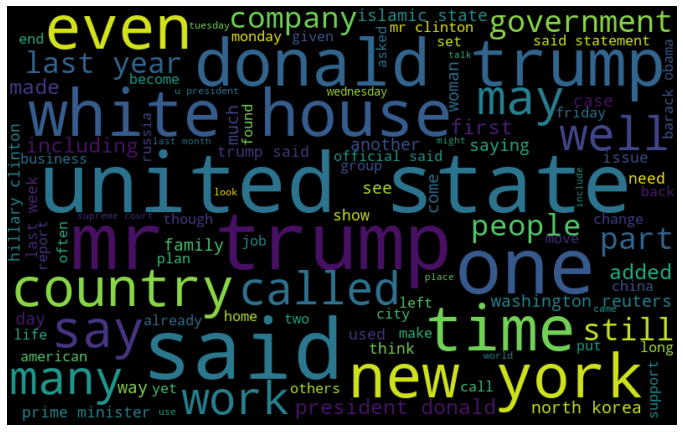

In [14]:
normal_word = ' '.join([word for word in df['final_text'][df['label']==0]])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 100, max_words = 100). generate(normal_word)
print('Normal words')
plt.figure(figsize = (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear', cmap = 'viridis')
plt.axis('off')

Hate words


(-0.5, 799.5, 499.5, -0.5)

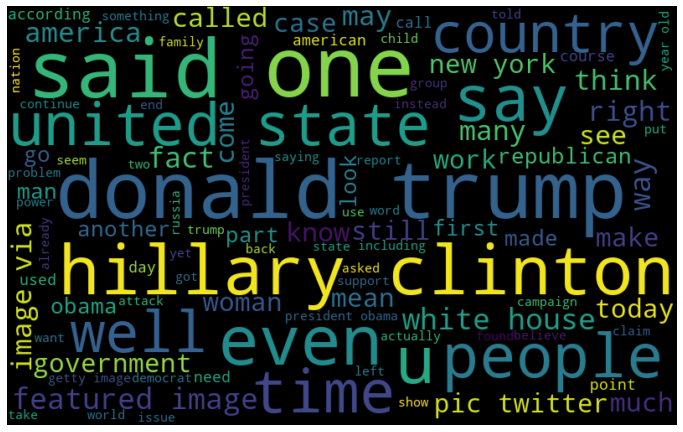

In [16]:
hate_word = ' '.join([word for word in df['final_text'][df['label']==1]])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 100, max_words = 100). generate(hate_word)
print('Hate words')
plt.figure(figsize = (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear', cmap = 'viridis')
plt.axis('off')

In [17]:
#collecting positive and negative words
positive = df['text_lemmatized'][df['label']==0]
negative = df['text_lemmatized'][df['label']==1]

In [18]:
#getting the most common postive words
positive = [val for sublist in positive for val in sublist]
q = Counter(positive)
q = dict(q.most_common())
postive_count = list(q.values())
positive_values = list(q.keys())

In [19]:
#getting the most common negative words
negative = [val for sublist in negative for val in sublist]
r = Counter(negative)
r = dict(r.most_common())
negative_count = list(r.values())
negative_values = list(r.keys())

In [20]:
#creating a dataframe
l1 = pd.DataFrame(positive_values, columns = ['Positive'])
l2 = pd.DataFrame(negative_count, columns = ['Positive_count'])
l3 = pd.DataFrame(negative_values, columns = ['Negative'])
l4 = pd.DataFrame(negative_count, columns = ['Negative_count'])
words_df = pd.concat([l1,l2,l3,l4], axis = 1)
words_df

,Positive,Positive_count,Negative,Negative_count
0,said,91528,trump,91528
1,trump,40067,said,40067
2,mr,39552,u,39552
3,state,39499,people,39499
4,u,37827,one,37827
...,...,...,...,...
165373,NaN,1,zuklappen,1
165374,NaN,1,weiterlaufen,1
165375,NaN,1,vernichten,1
165376,NaN,1,geplagte,1


In [21]:
words_df.drop_duplicates(inplace = True)
words_df = words_df[1:]
words_df.to_csv('words_df.csv',index = False)
words_df

,Positive,Positive_count,Negative,Negative_count
1,trump,40067,said,40067
2,mr,39552,u,39552
3,state,39499,people,39499
4,u,37827,one,37827
5,would,35276,clinton,35276
...,...,...,...,...
165373,NaN,1,zuklappen,1
165374,NaN,1,weiterlaufen,1
165375,NaN,1,vernichten,1
165376,NaN,1,geplagte,1


In [22]:
#Animated plot for positive words with their frequency
fig = px.bar(words_df[:20], x = 'Positive', y = 'Positive_count', animation_frame = 'Positive_count', hover_name = 'Positive')
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1200
fig.show()

In [23]:
#Animated plot for negative words with their frequency
fig = px.bar(words_df[:20], x = 'Negative', y = 'Negative_count', animation_frame = 'Negative_count', hover_name = 'Negative')
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1200
fig.show()

In [24]:
#Normal histogram of positive words
fig = px.bar(words_df[:20], x = "Positive", y = "Positive_count", hover_name = "Positive", color = 'Positive_count')
fig.show()

In [25]:
#Normal histogram of negative words
fig = px.bar(words_df[:20], x = "Negative", y = "Negative_count", hover_name = "Negative", color = 'Negative_count')
fig.show()

In [ ]:
# Algorithms used: 
# I. LogisticRegression
# II. DecisionTreeClassifier
# III. DecisionTreeClassifier.
# IV. GradientBoostingClassifier
# V. RandomForestClassifier
# VI. AdaBoostClassifier
# VII. XGBClassifier
# VIII. Naive Bayes
# IX. Support Vector Machine
# VII. LSTM and Convolutional Neural Network

In [26]:
#splitting the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df['final_text'].values,df['label'].values, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((51279,), (12820,), (51279,), (12820,))

In [27]:
#Bag of Words
bow_vectorizer = CountVectorizer(max_df = 0.9, min_df = 2, max_features = 1000, stop_words = 'english')
bow = bow_vectorizer.fit_transform(X_train)
bow.shape

(51279, 1000)

In [28]:
#TFIDF
tfidf_vectorizer = TfidfVectorizer(max_df = 0.9, min_df = 2, max_features = 1000, stop_words = 'english')
tfidf = tfidf_vectorizer.fit_transform(X_train)
tfidf.shape

(51279, 1000)

In [29]:
#We will create a custom function to see which model is predicting better
def Model(model, Input, Output, TestInput, TestOutput):
    clf = model
    clf.fit(Input,Output)
    test_prediction = clf.predict(TestInput)
    print(metrics.classification_report(y_true = TestOutput, y_pred = test_prediction))
    sns.heatmap(metrics.confusion_matrix(y_true = TestOutput, y_pred = test_prediction), fmt = 'd', annot = True)

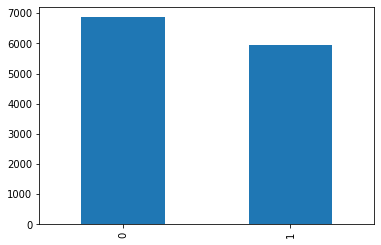

In [30]:
pd.Series(Y_test).value_counts().plot(kind = 'bar')

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      6864
           1       0.89      0.93      0.91      5956

    accuracy                           0.92     12820
   macro avg       0.92      0.92      0.92     12820
weighted avg       0.92      0.92      0.92     12820



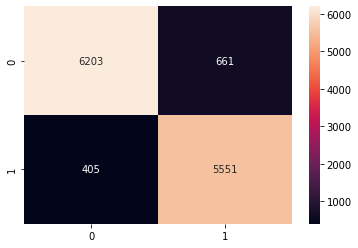

In [31]:
#logistic regression on Bow
Model(LogisticRegression(), bow, Y_train, bow_vectorizer.transform(X_test),Y_test)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      6864
           1       0.90      0.92      0.91      5956

    accuracy                           0.92     12820
   macro avg       0.91      0.92      0.91     12820
weighted avg       0.92      0.92      0.92     12820



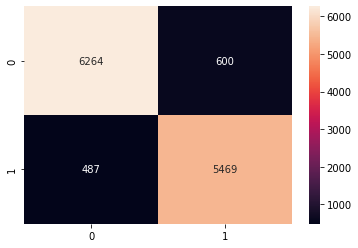

In [32]:
#logistic regression on tfidf
Model(LogisticRegression(), tfidf, Y_train, tfidf_vectorizer.transform(X_test),Y_test)

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      6864
           1       0.87      0.89      0.88      5956

    accuracy                           0.89     12820
   macro avg       0.89      0.89      0.89     12820
weighted avg       0.89      0.89      0.89     12820



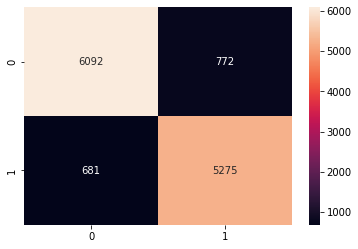

In [33]:
#Decision tree on Bow
Model(DecisionTreeClassifier(), bow, Y_train, bow_vectorizer.transform(X_test),Y_test)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      6864
           1       0.87      0.87      0.87      5956

    accuracy                           0.88     12820
   macro avg       0.88      0.88      0.88     12820
weighted avg       0.88      0.88      0.88     12820



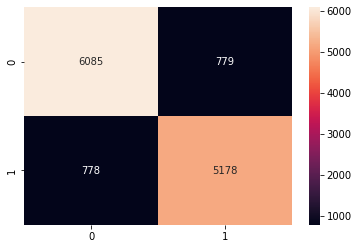

In [34]:
#Decision Tree Classifier on TF-IDF
Model(DecisionTreeClassifier(), tfidf, Y_train, tfidf_vectorizer.transform(X_test),Y_test)

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      6864
           1       0.89      0.94      0.92      5956

    accuracy                           0.92     12820
   macro avg       0.92      0.92      0.92     12820
weighted avg       0.92      0.92      0.92     12820



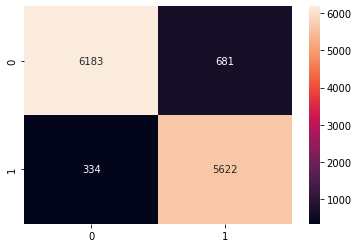

In [35]:
#Gradient Boosting Classifier on Bow
Model(GradientBoostingClassifier(), bow, Y_train, bow_vectorizer.transform(X_test),Y_test)

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      6864
           1       0.89      0.94      0.91      5956

    accuracy                           0.92     12820
   macro avg       0.92      0.92      0.92     12820
weighted avg       0.92      0.92      0.92     12820



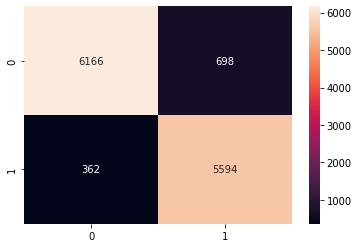

In [36]:
#Gradient Boosting Classifier on TF-IDF
Model(GradientBoostingClassifier(), tfidf, Y_train, tfidf_vectorizer.transform(X_test),Y_test)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      6864
           1       0.90      0.92      0.91      5956

    accuracy                           0.92     12820
   macro avg       0.92      0.92      0.92     12820
weighted avg       0.92      0.92      0.92     12820



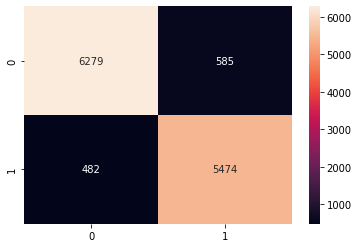

In [37]:
#Random Forest Classifier on Bow
Model(RandomForestClassifier(), bow, Y_train, bow_vectorizer.transform(X_test),Y_test)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      6864
           1       0.90      0.92      0.91      5956

    accuracy                           0.92     12820
   macro avg       0.92      0.92      0.92     12820
weighted avg       0.92      0.92      0.92     12820



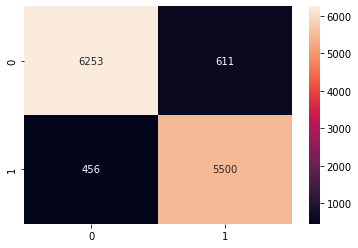

In [38]:
#Random Forest Classifier on TF-IDF
Model(RandomForestClassifier(), tfidf, Y_train, tfidf_vectorizer.transform(X_test),Y_test)

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      6864
           1       0.88      0.92      0.90      5956

    accuracy                           0.91     12820
   macro avg       0.91      0.91      0.91     12820
weighted avg       0.91      0.91      0.91     12820



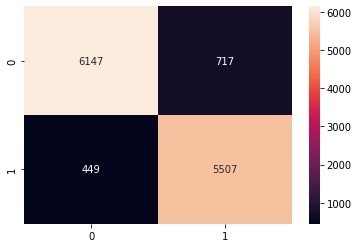

In [39]:
#Ada Boost Classifier on Bow
Model(AdaBoostClassifier(), bow, Y_train, bow_vectorizer.transform(X_test),Y_test)

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      6864
           1       0.88      0.92      0.90      5956

    accuracy                           0.91     12820
   macro avg       0.90      0.91      0.90     12820
weighted avg       0.91      0.91      0.91     12820



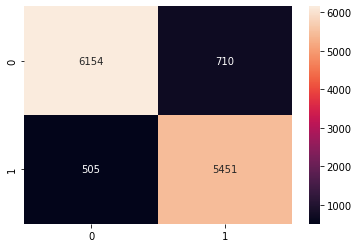

In [40]:
#Ada Boost Classifier on TF-IDF
Model(AdaBoostClassifier(), tfidf, Y_train, tfidf_vectorizer.transform(X_test),Y_test)

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      6864
           1       0.89      0.94      0.92      5956

    accuracy                           0.92     12820
   macro avg       0.92      0.92      0.92     12820
weighted avg       0.92      0.92      0.92     12820



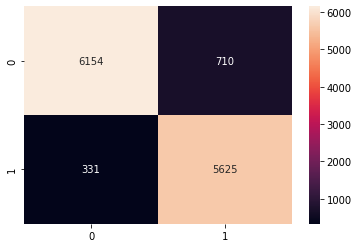

In [41]:
#XG Boost Classifier on Bow
Model(XGBClassifier(), bow, Y_train, bow_vectorizer.transform(X_test),Y_test)

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      6864
           1       0.89      0.94      0.91      5956

    accuracy                           0.92     12820
   macro avg       0.92      0.92      0.92     12820
weighted avg       0.92      0.92      0.92     12820



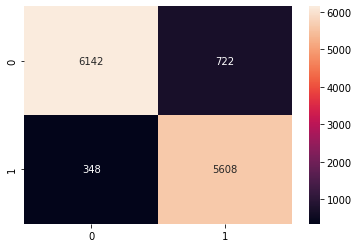

In [42]:
#XG Boost Classifier on TF-IDF
Model(XGBClassifier(), tfidf, Y_train, tfidf_vectorizer.transform(X_test),Y_test)

              precision    recall  f1-score   support

           0       0.86      0.60      0.71      6864
           1       0.66      0.89      0.76      5956

    accuracy                           0.73     12820
   macro avg       0.76      0.74      0.73     12820
weighted avg       0.77      0.73      0.73     12820



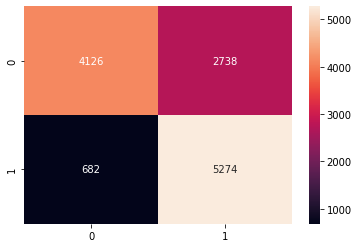

In [43]:
#Gaussian Naive Bayes Classifier on Bow
Model(GaussianNB(), bow.todense(), Y_train, bow_vectorizer.transform(X_test).todense(),Y_test)

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      6864
           1       0.79      0.83      0.81      5956

    accuracy                           0.82     12820
   macro avg       0.82      0.82      0.82     12820
weighted avg       0.82      0.82      0.82     12820



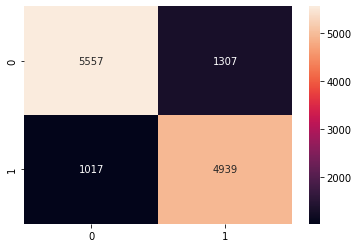

In [44]:
#Gaussian Naive Bayes Classifier on TF-IDF
Model(GaussianNB(), tfidf.todense(), Y_train, tfidf_vectorizer.transform(X_test).todense(),Y_test)

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      6864
           1       0.83      0.85      0.84      5956

    accuracy                           0.85     12820
   macro avg       0.85      0.85      0.85     12820
weighted avg       0.85      0.85      0.85     12820



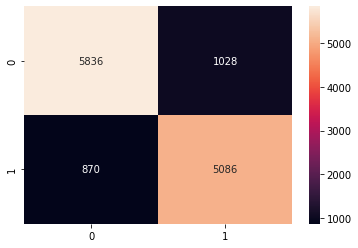

In [45]:
#Multinomial Naive Bayes Classifier on Bow
Model(MultinomialNB(), bow, Y_train, bow_vectorizer.transform(X_test),Y_test)

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      6864
           1       0.81      0.82      0.82      5956

    accuracy                           0.83     12820
   macro avg       0.83      0.83      0.83     12820
weighted avg       0.83      0.83      0.83     12820



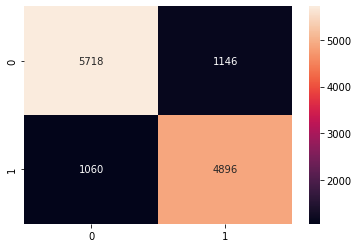

In [46]:
#Multinomial Naive Bayes Classifier on TF-IDF
Model(MultinomialNB(), tfidf, Y_train, tfidf_vectorizer.transform(X_test),Y_test)

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      6864
           1       0.88      0.94      0.91      5956

    accuracy                           0.91     12820
   macro avg       0.91      0.91      0.91     12820
weighted avg       0.91      0.91      0.91     12820



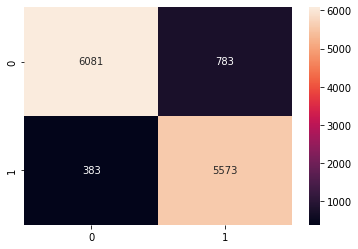

In [47]:
#Stochastic Gradient Descent Classifier on Bow
Model(SGDClassifier(), bow, Y_train, bow_vectorizer.transform(X_test),Y_test)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      6864
           1       0.90      0.92      0.91      5956

    accuracy                           0.92     12820
   macro avg       0.92      0.92      0.92     12820
weighted avg       0.92      0.92      0.92     12820



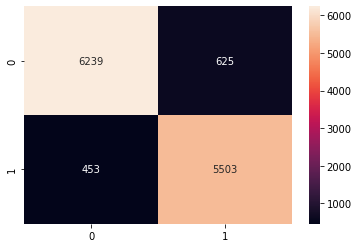

In [48]:
#Stochastic Gradient Descent Classifier on TF-IDF
Model(SGDClassifier(), tfidf, Y_train, tfidf_vectorizer.transform(X_test),Y_test)

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      6864
           1       0.79      0.82      0.81      5956

    accuracy                           0.82     12820
   macro avg       0.82      0.82      0.82     12820
weighted avg       0.82      0.82      0.82     12820



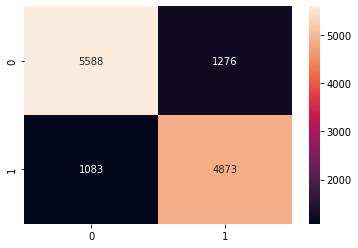

In [49]:
#K nearest neighbor Classifier on Bow
Model(KNeighborsClassifier(), bow, Y_train, bow_vectorizer.transform(X_test),Y_test)

              precision    recall  f1-score   support

           0       0.86      0.62      0.72      6864
           1       0.67      0.88      0.76      5956

    accuracy                           0.74     12820
   macro avg       0.76      0.75      0.74     12820
weighted avg       0.77      0.74      0.74     12820



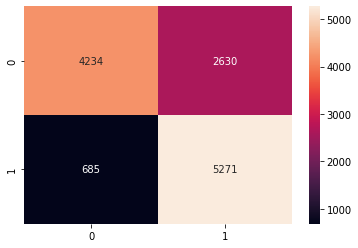

In [50]:
#K nearest neighbor Classifier on TF-IDF
Model(KNeighborsClassifier(), tfidf, Y_train, tfidf_vectorizer.transform(X_test),Y_test)